In [75]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [76]:
%reload_ext autoreload
%autoreload 2

In [87]:
# Import libraries
import os
import sys
# sys.path.append('/Users/shg309/Dropbox/Education/hks_cid_growth_lab/misc/ecomplexity/')
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from ecomplexity import ComplexityData

In [78]:
# Read example dataset
data = pd.read_csv('data/raw/year_origin_hs92_4.tsv',sep='\t')
data.drop(columns=['export_rca','import_rca','import_val'], inplace=True)
data = data[~data.origin.str.startswith('xx')]
data = data[data.export_val.notnull() & data.export_val!=0]
data = data[data.year.isin(list(range(1995,2001)))]
data.head()

,year,origin,hs92,export_val
12,1995,ago,302,34736.02
13,1995,ago,303,7537200.37
14,1995,ago,304,268374.02
15,1995,ago,305,3678.12
16,1995,ago,306,21208933.79


In [79]:
data.describe(include='all')

,year,origin,hs92,export_val
count,743920.000000,743920,743920.000000,7.439200e+05
unique,NaN,222,NaN,NaN
top,NaN,deu,NaN,NaN
freq,NaN,7249,NaN,NaN
mean,1997.578432,NaN,5391.355718,4.067107e+07
std,1.707920,NaN,2778.234930,4.565344e+08
min,1995.000000,NaN,101.000000,1.000000e+03
25%,1996.000000,NaN,2919.000000,2.557100e+04
50%,1998.000000,NaN,5604.000000,2.877968e+05
75%,1999.000000,NaN,8305.000000,4.341695e+06


In [80]:
cdata = ComplexityData(data,{'time':'year','loc':'origin','prod':'hs92','val':'export_val'})

TIMING: function rename_cols took 0:00:00.059072.
TIMING: function clean_data took 0:00:00.124457.
TIMING: function create_full_df took 0:00:02.497443.
TIMING: function calculate_rca_and_mcp took 0:00:00.046334.
TIMING: function calculate_Mcc_Mpp took 0:00:05.030904.
TIMING: function calculate_Kvec took 0:00:07.126179.
TIMING: function calculate_Kvec took 0:00:00.123715.
TIMING: function reshape_output_to_data took 0:00:00.329373.


In [81]:
# Create pop df to test rpop
from itertools import product

random_pop_df = pd.DataFrame(list(product(np.arange(2000,2010), ['aus','usa','jam'])))
random_pop_df.columns = ['time','loc']
random_pop_df['pop'] = np.random.randint(200000,2e6,len(random_pop_df))
random_pop_df.head()

,time,loc,pop
0,2000,aus,1675806
1,2000,usa,1641486
2,2000,jam,935005
3,2001,aus,452530
4,2001,usa,472781


In [82]:
# Test rpop
np.nansum(cdata.calculate_rpop(random_pop_df))

434.9468313039016

In [83]:
cdata.output.head()

,time,loc,prod,val,diversity,ubiquity,rca,eci,pci
0,1995,abw,101,18000.0,13,21,0.125462,-0.333912,-0.125979
1,1995,abw,102,0.0,13,28,0.000000,-0.333912,-0.009886
2,1995,abw,103,0.0,13,11,0.000000,-0.333912,-0.209597
3,1995,abw,104,0.0,13,32,0.000000,-0.333912,0.936758
4,1995,abw,105,0.0,13,22,0.000000,-0.333912,-0.210029


Note that we cannot test ECI and PCI against stata output because they are normalized values, so if there's anything off, we can't tell where the difference stems from. To compare, we generate ECI / PCI ranking variables in both ecomplexity and py-ecomplexity to test.

In [84]:
cdata.output['eci_rank'] = cdata.output.eci.rank(ascending=False)
cdata.output['pci_rank'] = cdata.output.pci.rank(ascending=False)

In [85]:
cdata.output.describe()

,time,prod,val,diversity,ubiquity,rca,eci,pci,eci_rank,pci_rank
count,1.653012e+06,1.653012e+06,1.653012e+06,1.653012e+06,1.653012e+06,1.557123e+06,1.653012e+06,1.653012e+06,1.653012e+06,1.653012e+06
mean,1.997500e+03,5.302039e+03,1.830357e+07,1.240533e+02,2.219165e+01,1.644152e+00,-7.152659e-18,1.229363e-18,8.265065e+05,8.265065e+05
std,1.707826e+00,2.766639e+03,3.069334e+08,1.172451e+02,1.276780e+01,7.222061e+01,1.000000e+00,1.000000e+00,4.771831e+05,4.771834e+05
min,1.995000e+03,1.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.588414e+00,-4.443329e+00,6.210000e+02,1.115000e+02
25%,1.996000e+03,2.843000e+03,0.000000e+00,3.500000e+01,1.400000e+01,0.000000e+00,-7.058645e-01,-6.266942e-01,4.135638e+05,4.132535e+05
50%,1.997500e+03,5.402000e+03,0.000000e+00,8.300000e+01,1.900000e+01,0.000000e+00,2.999573e-03,-1.664073e-01,8.265065e+05,8.265065e+05
75%,1.999000e+03,8.101000e+03,1.654814e+05,1.770000e+02,2.800000e+01,1.607942e-01,6.696915e-01,4.162399e-01,1.239449e+06,1.239760e+06
max,2.000000e+03,9.706000e+03,6.321099e+10,5.790000e+02,9.000000e+01,2.899764e+04,3.687933e+00,6.024106e+00,1.652392e+06,1.652902e+06


### Compare against Stata output

In [89]:
stata_output = pd.read_csv("data/processed/year_origin_hs92_4_ecomplexity_stata.csv")
stata_output.head()

,year,origin,hs92,export_val,rca,M,density,eci,pci,diversity,ubiquity,coi,cog
0,1995,abw,101,18000.0,0.125462,0,0.013778,-0.304556,0.890525,13,21,-0.818425,0.371127
1,1995,abw,102,0.0,0.000000,0,0.011978,-0.304556,0.633608,13,28,-0.818425,0.526210
2,1995,abw,103,0.0,0.000000,0,0.007225,-0.304556,1.484602,13,11,-0.818425,0.540365
3,1995,abw,104,0.0,0.000000,0,0.011399,-0.304556,-0.714548,13,32,-0.818425,0.041191
4,1995,abw,105,0.0,0.000000,0,0.008215,-0.304556,1.051965,13,22,-0.818425,0.662659


In [90]:
stata_output.describe()

,year,hs92,export_val,rca,M,density,eci,pci,diversity,ubiquity,coi,cog
count,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06,1.557123e+06
mean,1.997530e+03,5.241205e+03,1.943072e+07,1.644152e+00,1.061181e-01,1.083701e-01,-4.154316e-17,1.091138e+00,1.284242e+02,2.277620e+01,2.252384e-17,5.361770e-01
std,1.719617e+00,2.754535e+03,3.162082e+08,7.222061e+01,3.079889e-01,1.102602e-01,9.999984e-01,1.837101e+00,1.169451e+02,1.242004e+01,9.999984e-01,5.567895e-01
min,1.995000e+03,1.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.545359e+00,-4.680859e+00,1.000000e+00,1.000000e+00,-2.712970e+00,-9.941100e-01
25%,1.996000e+03,2.836000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.790158e-02,-7.313717e-01,-1.776829e-01,4.000000e+01,1.400000e+01,-7.833172e-01,0.000000e+00
50%,1.998000e+03,5.301000e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.609371e-02,1.221722e-02,1.226569e+00,8.600000e+01,2.000000e+01,-4.171078e-01,5.107062e-01
75%,1.999000e+03,7.907000e+03,2.282669e+05,1.607942e-01,0.000000e+00,1.537460e-01,6.783272e-01,2.462985e+00,1.810000e+02,2.800000e+01,6.639519e-01,9.697524e-01
max,2.000000e+03,9.706000e+03,6.321099e+10,2.899764e+04,1.000000e+00,1.000000e+00,3.687926e+00,7.783660e+00,5.790000e+02,9.000000e+01,3.986591e+00,2.111014e+00


In [91]:
# Generate ranking vars for eci and pci
stata_output['eci_rank'] = stata_output.eci.rank(ascending=False)
stata_output['pci_rank'] = stata_output.pci.rank(ascending=False)

In [92]:
# Check each var against stata output
def check_var(merged_outputs, varname):
    return(merged_outputs[~np.isclose(merged_outputs[varname+"_py"], merged_outputs[varname+"_st"],
                                      equal_nan=True)])

In [93]:
def check_mismatch_stats(merged_outputs, varlist):
    res = {x:len(check_var(merged_outputs, x)) for x in varlist}
    return(res)

In [94]:
merged_outputs = cdata.output.merge(stata_output, how='outer', left_on=['time','loc','prod'],
                                    right_on=['year','origin','hs92'], indicator=True,
                                    suffixes=['_py','_st'])

In [95]:
merged_outputs._merge.value_counts()

both          1557123
left_only       95889
right_only          0
Name: _merge, dtype: int64

There seem to be some "left_only", that means that py-ecomplexity is generating some extra records

In [96]:
wrong_var = check_var(merged_outputs, "eci")
wrong_var.head()

,time,loc,prod,val,diversity_py,ubiquity_py,rca_py,eci_py,pci_py,eci_rank_py,...,density,eci_st,pci_st,diversity_st,ubiquity_st,coi,cog,eci_rank_st,pci_rank_st,_merge
0,1995,abw,101,18000.0,13,21,0.125462,-0.333912,-0.125979,1015759.0,...,0.013778,-0.304556,0.890525,13.0,21.0,-0.818425,0.371127,956131.5,872966.0,both
1,1995,abw,102,0.0,13,28,0.000000,-0.333912,-0.009886,1015759.0,...,0.011978,-0.304556,0.633608,13.0,28.0,-0.818425,0.526210,956131.5,956186.0,both
2,1995,abw,103,0.0,13,11,0.000000,-0.333912,-0.209597,1015759.0,...,0.007225,-0.304556,1.484602,13.0,11.0,-0.818425,0.540365,956131.5,692669.0,both
3,1995,abw,104,0.0,13,32,0.000000,-0.333912,0.936758,1015759.0,...,0.011399,-0.304556,-0.714548,13.0,32.0,-0.818425,0.041191,956131.5,1277834.0,both
4,1995,abw,105,0.0,13,22,0.000000,-0.333912,-0.210029,1015759.0,...,0.008215,-0.304556,1.051965,13.0,22.0,-0.818425,0.662659,956131.5,830699.0,both


In [97]:
check_mismatch_stats(merged_outputs, ['rca','diversity','ubiquity','eci','pci','eci_rank','pci_rank'])

{'rca': 0,
 'diversity': 95889,
 'ubiquity': 95889,
 'eci': 1376306,
 'pci': 1653012,
 'eci_rank': 1651771,
 'pci_rank': 1653012}

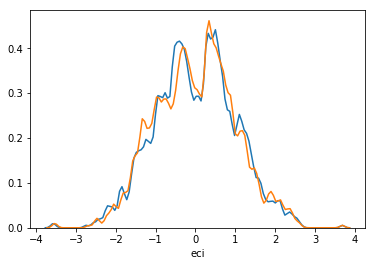

In [101]:
ax = sns.distplot(cdata.output.eci, hist=False)
ax = sns.distplot(stata_output.eci, hist=False, ax=ax)
plt.show()

### Testing Area
Below this is temp testing area

In [22]:
data.columns

Index(['year', 'origin', 'hs92', 'export_val'], dtype='object')

In [ ]:
data.desc

In [ ]:
check.diversity[:,:,np.newaxis].shape

In [ ]:
a = np.arange(24).reshape(2,3,4)
b = np.arange(12).reshape(3,4)[np.newaxis,:,:]
print(a)
print(b)

In [ ]:
a.ravel()

In [ ]:
b.repeat(a.shape[0], axis=0)

In [ ]:
### Temp
a = pd.DataFrame(list(product(np.arange(2000,2010), ['aus','usa','jam'], ['prod1','prod2'])))
a.columns = ['time','loc','prod']
a['val'] = np.random.randint(200000,2e6,len(a))
a = a[~((a.time==2002) & (a['loc']=='jam'))]
a = a[~((a.time==2003) & (a['loc']=='aus'))]
a = a.set_index(['time','loc','prod'])
# a

In [ ]:
## Temp
index_df = data.head(n=100000).copy().reset_index(drop=True) \
    .rename(columns={'year':'time','origin':'loc'}) \
    .set_index(['time','loc'])
pop_index = pd.MultiIndex.from_product(
            [index_df.index.levels[0], index_df.index.levels[1]],
            names=['time', 'loc'])
random_pop_df.reindex(index=pop_index)
index_df

In [ ]:
### Temp Testing ###
a = np.arange(24).reshape(2,3,4)

In [ ]:
a = data.head()
a.head()               